In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")


**Обработка пропусков, кодирование категориальных признаков, масштабирование**

In [2]:
df = pd.read_csv('orders_a.csv', sep=";")

In [3]:
df.head()

,web-scraper-order,name,transp_name,max_weight,Volume,order_link,Unnamed: 6,Unnamed: 7,distance,adr_start,adr_end,date_start,duration,price,order_num,order_name,order_info,fuel_av_100,Unnamed: 18,date_start.1
0,1715027894-1,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1,Шасси,"холодильник, стиральная машина, 3 разобранных ...",NaN,NaN,120.0,Москва,Руза,15.05.2019,3,2870,№ 1327110,"Перевезти холодильник, стиральная машина, 3 р...",Груз № 1: холодильник \n ...,"10,26962033",NaN,15.05.2019
1,1715027920-2,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1,Шасси,Диван,NaN,NaN,81.0,Москва,Нестерово,19.05.2019,5,2980,№ 1329216,Перевозка мебели,Груз : Диван \n ...,"8,266780113",NaN,19.05.2019
2,1715027946-3,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1,Шасси,Угловой диван (разбирается на 3 части),NaN,NaN,130.0,Москва,посёлок Тархановка,24.05.2019,3,3709,№ 1330136,Грузоперевозки попутно,Груз :\n\t\t\t\t\t\t\tУгловой диван (разбирает...,"12,70507539",NaN,24.05.2019
3,1715027971-4,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1,Шасси,"Бензогенератор ,мотокультиватор",NaN,NaN,124.0,Москва,Московская обл. Нарофоминский район,21.05.2019,4,4190,№ 1330462,"Отправить Бензогенератор ,мотокультиватор","Груз : Бензогенератор ,мотокультиватор \n ...","12,96244625",NaN,21.05.2019
4,1715027997-5,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1,Шасси,Квартирный переезд,NaN,NaN,19.0,Москва,Москва,27.05.2019,3,1130,№ 1330823,Заказ авто для квартирного переезда,Дата перевозки: с 27.05 по 31.05\n\t\t\t\t\tВ...,"8,648527339",NaN,27.05.2019


In [4]:
df = df.drop(axis=1, columns=['Unnamed: 6', 'Unnamed: 7', 'order_link', 'web-scraper-order', 'Unnamed: 18', 'date_start.1'])
df.head()


,name,transp_name,max_weight,Volume,distance,adr_start,adr_end,date_start,duration,price,order_num,order_name,order_info,fuel_av_100
0,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1,Шасси,120.0,Москва,Руза,15.05.2019,3,2870,№ 1327110,"Перевезти холодильник, стиральная машина, 3 р...",Груз № 1: холодильник \n ...,"10,26962033"
1,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1,Шасси,81.0,Москва,Нестерово,19.05.2019,5,2980,№ 1329216,Перевозка мебели,Груз : Диван \n ...,"8,266780113"
2,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1,Шасси,130.0,Москва,посёлок Тархановка,24.05.2019,3,3709,№ 1330136,Грузоперевозки попутно,Груз :\n\t\t\t\t\t\t\tУгловой диван (разбирает...,"12,70507539"
3,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1,Шасси,124.0,Москва,Московская обл. Нарофоминский район,21.05.2019,4,4190,№ 1330462,"Отправить Бензогенератор ,мотокультиватор","Груз : Бензогенератор ,мотокультиватор \n ...","12,96244625"
4,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1,Шасси,19.0,Москва,Москва,27.05.2019,3,1130,№ 1330823,Заказ авто для квартирного переезда,Дата перевозки: с 27.05 по 31.05\n\t\t\t\t\tВ...,"8,648527339"


In [5]:
df = df.dropna(subset=['name'])
df.isnull().sum()

name            0
transp_name     0
max_weight      0
Volume          0
distance        0
adr_start      10
adr_end        19
date_start      0
duration        0
price           0
order_num       0
order_name      0
order_info      0
fuel_av_100     0
dtype: int64

In [6]:
df=df.dropna(axis=0, subset=['adr_end', 'adr_start', 'distance'] )
df.isnull().sum()

name           0
transp_name    0
max_weight     0
Volume         0
distance       0
adr_start      0
adr_end        0
date_start     0
duration       0
price          0
order_num      0
order_name     0
order_info     0
fuel_av_100    0
dtype: int64

In [7]:
df = df.drop_duplicates()
df.shape

(4574, 14)

Типы данных в столбцах

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4574 entries, 0 to 4602
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         4574 non-null   object 
 1   transp_name  4574 non-null   object 
 2   max_weight   4574 non-null   object 
 3   Volume       4574 non-null   object 
 4   distance     4574 non-null   float64
 5   adr_start    4574 non-null   object 
 6   adr_end      4574 non-null   object 
 7   date_start   4574 non-null   object 
 8   duration     4574 non-null   object 
 9   price        4574 non-null   int64  
 10  order_num    4574 non-null   object 
 11  order_name   4574 non-null   object 
 12  order_info   4574 non-null   object 
 13  fuel_av_100  4574 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 536.0+ KB


In [9]:
df['fuel_av_100'] = df['fuel_av_100'].apply(lambda x: float(x.replace(',', '.')))

In [10]:
df['duration'] = df['duration'].apply(lambda x: float(x.replace(',', '.')))


In [11]:
df['max_weight'] = df['max_weight'].apply(lambda x: float(x.replace(',', '.')))

In [12]:
df['price_tot'] = df['fuel_av_100']/100 * df['distance']

Извлекаем информацию - категория заказа

In [13]:
def cat(str):
    start = 'Категория: '
    end = '\n'  
    start_index = str.find(start)
    end_index = str.find(end, start_index)
    if start_index != -1 and end_index != -1:
        result = str[start_index + len(start):end_index]
        return result.strip()
    else:
        return "Не указана"

In [14]:
df['order_info_cat'] = df['order_info'].apply(cat)
df.head()

,name,transp_name,max_weight,Volume,distance,adr_start,adr_end,date_start,duration,price,order_num,order_name,order_info,fuel_av_100,price_tot,order_info_cat
0,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1.0,Шасси,120.0,Москва,Руза,15.05.2019,3.0,2870,№ 1327110,"Перевезти холодильник, стиральная машина, 3 р...",Груз № 1: холодильник \n ...,10.269620,12.323544,Мебель и бытовая техника
1,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1.0,Шасси,81.0,Москва,Нестерово,19.05.2019,5.0,2980,№ 1329216,Перевозка мебели,Груз : Диван \n ...,8.266780,6.696092,Мебель и бытовая техника
2,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1.0,Шасси,130.0,Москва,посёлок Тархановка,24.05.2019,3.0,3709,№ 1330136,Грузоперевозки попутно,Груз :\n\t\t\t\t\t\t\tУгловой диван (разбирает...,12.705075,16.516598,Догруз
3,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1.0,Шасси,124.0,Москва,Московская обл. Нарофоминский район,21.05.2019,4.0,4190,№ 1330462,"Отправить Бензогенератор ,мотокультиватор","Груз : Бензогенератор ,мотокультиватор \n ...",12.962446,16.073433,Мебель и бытовая техника
4,03golkin03,Citroen Jumper 35MH 2.8 HDi (128),1.0,Шасси,19.0,Москва,Москва,27.05.2019,3.0,1130,№ 1330823,Заказ авто для квартирного переезда,Дата перевозки: с 27.05 по 31.05\n\t\t\t\t\tВ...,8.648527,1.643220,Не указана


In [15]:
df = df.drop(axis=1,columns=['order_info', 'name'])

Кодирование категориальных признаков в числовые Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
cat_enc1 = pd.DataFrame({'c1': df.transp_name})
cat_enc1['c1'].unique()
le = LabelEncoder()
df.transp_name = le.fit_transform(cat_enc1['c1'])
df.head()

,transp_name,max_weight,Volume,distance,adr_start,adr_end,date_start,duration,price,order_num,order_name,fuel_av_100,price_tot,order_info_cat
0,0,1.0,Шасси,120.0,Москва,Руза,15.05.2019,3.0,2870,№ 1327110,"Перевезти холодильник, стиральная машина, 3 р...",10.269620,12.323544,Мебель и бытовая техника
1,0,1.0,Шасси,81.0,Москва,Нестерово,19.05.2019,5.0,2980,№ 1329216,Перевозка мебели,8.266780,6.696092,Мебель и бытовая техника
2,0,1.0,Шасси,130.0,Москва,посёлок Тархановка,24.05.2019,3.0,3709,№ 1330136,Грузоперевозки попутно,12.705075,16.516598,Догруз
3,0,1.0,Шасси,124.0,Москва,Московская обл. Нарофоминский район,21.05.2019,4.0,4190,№ 1330462,"Отправить Бензогенератор ,мотокультиватор",12.962446,16.073433,Мебель и бытовая техника
4,0,1.0,Шасси,19.0,Москва,Москва,27.05.2019,3.0,1130,№ 1330823,Заказ авто для квартирного переезда,8.648527,1.643220,Не указана


In [18]:
cat_enc3 = pd.DataFrame({'c3': df.Volume})
cat_enc3['c3'].unique()
df.Volume = le.fit_transform(cat_enc3['c3'])


In [19]:
cat_enc4 = pd.DataFrame({'c4': df.order_info_cat})
cat_enc4


,c4
0,Мебель и бытовая техника
1,Мебель и бытовая техника
2,Догруз
3,Мебель и бытовая техника
4,Не указана
...,...
4598,Мебель и бытовая техника
4599,Прочие грузы
4600,Не указана
4601,Мебель и бытовая техника


In [20]:
cat_enc4['c4'].unique()

array(['Мебель и бытовая техника', 'Догруз', 'Не указана', 'Прочие грузы',
       'Строительные грузы и оборудование', 'Вывоз мусора',
       'Транспортные средства', 'Пассажирские перевозки',
       'Перевозка животных', 'Продукты питания'], dtype=object)

In [21]:
df.order_info_cat = le.fit_transform(cat_enc4['c4'])
df.head()

,transp_name,max_weight,Volume,distance,adr_start,adr_end,date_start,duration,price,order_num,order_name,fuel_av_100,price_tot,order_info_cat
0,0,1.0,6,120.0,Москва,Руза,15.05.2019,3.0,2870,№ 1327110,"Перевезти холодильник, стиральная машина, 3 р...",10.269620,12.323544,2
1,0,1.0,6,81.0,Москва,Нестерово,19.05.2019,5.0,2980,№ 1329216,Перевозка мебели,8.266780,6.696092,2
2,0,1.0,6,130.0,Москва,посёлок Тархановка,24.05.2019,3.0,3709,№ 1330136,Грузоперевозки попутно,12.705075,16.516598,1
3,0,1.0,6,124.0,Москва,Московская обл. Нарофоминский район,21.05.2019,4.0,4190,№ 1330462,"Отправить Бензогенератор ,мотокультиватор",12.962446,16.073433,2
4,0,1.0,6,19.0,Москва,Москва,27.05.2019,3.0,1130,№ 1330823,Заказ авто для квартирного переезда,8.648527,1.643220,3


In [22]:
df['profit'] = df['price'] - df['price_tot']
df[['d', 'm', 'y']] = df['date_start'].str.split('.', expand=True)
df.head()

,transp_name,max_weight,Volume,distance,adr_start,adr_end,date_start,duration,price,order_num,order_name,fuel_av_100,price_tot,order_info_cat,profit,d,m,y
0,0,1.0,6,120.0,Москва,Руза,15.05.2019,3.0,2870,№ 1327110,"Перевезти холодильник, стиральная машина, 3 р...",10.269620,12.323544,2,2857.676456,15,05,2019
1,0,1.0,6,81.0,Москва,Нестерово,19.05.2019,5.0,2980,№ 1329216,Перевозка мебели,8.266780,6.696092,2,2973.303908,19,05,2019
2,0,1.0,6,130.0,Москва,посёлок Тархановка,24.05.2019,3.0,3709,№ 1330136,Грузоперевозки попутно,12.705075,16.516598,1,3692.483402,24,05,2019
3,0,1.0,6,124.0,Москва,Московская обл. Нарофоминский район,21.05.2019,4.0,4190,№ 1330462,"Отправить Бензогенератор ,мотокультиватор",12.962446,16.073433,2,4173.926567,21,05,2019
4,0,1.0,6,19.0,Москва,Москва,27.05.2019,3.0,1130,№ 1330823,Заказ авто для квартирного переезда,8.648527,1.643220,3,1128.356780,27,05,2019


Функции, для отсева нерелевантных данных

In [23]:
def no_year(x):
    if x == None:
        return '2024'
    else:
        return x


def noo_month(x):
    if x == None:
        return '05'
    else:
        return x


In [24]:
df['d'] = df['d'].astype(int)
df['y'] = df['y'].apply(no_year).astype(int)
df['m'] = df['m'].apply(noo_month).astype(int)

In [25]:
df = df[(df['y'] != 2024) | (df['m'] != 5)] #месяц ещё не закончился

In [26]:
df.head()

,transp_name,max_weight,Volume,distance,adr_start,adr_end,date_start,duration,price,order_num,order_name,fuel_av_100,price_tot,order_info_cat,profit,d,m,y
0,0,1.0,6,120.0,Москва,Руза,15.05.2019,3.0,2870,№ 1327110,"Перевезти холодильник, стиральная машина, 3 р...",10.269620,12.323544,2,2857.676456,15,5,2019
1,0,1.0,6,81.0,Москва,Нестерово,19.05.2019,5.0,2980,№ 1329216,Перевозка мебели,8.266780,6.696092,2,2973.303908,19,5,2019
2,0,1.0,6,130.0,Москва,посёлок Тархановка,24.05.2019,3.0,3709,№ 1330136,Грузоперевозки попутно,12.705075,16.516598,1,3692.483402,24,5,2019
3,0,1.0,6,124.0,Москва,Московская обл. Нарофоминский район,21.05.2019,4.0,4190,№ 1330462,"Отправить Бензогенератор ,мотокультиватор",12.962446,16.073433,2,4173.926567,21,5,2019
4,0,1.0,6,19.0,Москва,Москва,27.05.2019,3.0,1130,№ 1330823,Заказ авто для квартирного переезда,8.648527,1.643220,3,1128.356780,27,5,2019


In [27]:
df = df.drop(columns=['order_name', 'order_num', 'date_start'])

Убеждаемся, что слишком много уникальных значений, нет смысла учитывать признаки:

In [28]:
df.adr_end.unique()
df.adr_start.unique()

array(['Москва', 'Москва кутузовский 26 корпус 3',
       'рабочий посёлок Обухово', 'ул Яблочкова', 'Булатниковское',
       'посёлок Коммунарка', 'Красногорск', 'Видное', 'Королев',
       'посёлок Архангельское', 'Севастопольский проспект 48 к1',
       'Долгопрудный', 'Химки', 'Раменский р-н', 'Люберцы',
       '1-я Ватутинская', 'мкр. Климовск', 'деревня Пучково', 'Подольск',
       'Малаховка', 'деревня Руднево', 'Ленинский проспект 93 к 3',
       'Москва  (п Щаповское)', '48 деревня Каменное Тяжино',
       'Коммунарка', 'ул Овражная', 'Мытищи', 'Домодедово', 'Раменское',
       'Московская область', 'Реутов', 'Балашиха', 'подъезд5',
       'Немчиновка', 'пл. Академика Курчатова', 'Братовщина',
       'Московская обл.', 'Зарайск', '18 Мытищи', 'Щелково',
       'Электросталь', 'Ногинск', 'Ильинский', 'Старая Купавна',
       'Одинцово', 'Нахабино', 'Речицы', 'Внуково',
       'Инновационный центр Сколково', 'корпус 1. Посёлок коренево',
       'Дмитровский район Мечта Кп', 'Щел

In [29]:
df=df.drop(axis=1,columns=['adr_start', 'adr_end'])

Создаём колонку прибыль от транспортного средства в час

In [30]:
df['profit_per_hour'] = df['profit']/df['duration']

Прибыль в месяц

In [31]:
df['profit_per_m'] = df.groupby(['y', 'm'])['profit'].transform('sum')
df.head()

,transp_name,max_weight,Volume,distance,duration,price,fuel_av_100,price_tot,order_info_cat,profit,d,m,y,profit_per_hour,profit_per_m
0,0,1.0,6,120.0,3.0,2870,10.269620,12.323544,2,2857.676456,15,5,2019,952.558819,1.262957e+06
1,0,1.0,6,81.0,5.0,2980,8.266780,6.696092,2,2973.303908,19,5,2019,594.660782,1.262957e+06
2,0,1.0,6,130.0,3.0,3709,12.705075,16.516598,1,3692.483402,24,5,2019,1230.827801,1.262957e+06
3,0,1.0,6,124.0,4.0,4190,12.962446,16.073433,2,4173.926567,21,5,2019,1043.481642,1.262957e+06
4,0,1.0,6,19.0,3.0,1130,8.648527,1.643220,3,1128.356780,27,5,2019,376.118927,1.262957e+06


% месячной прибыли компании от поездки

In [79]:
df['profit_%'] = df['profit'] / df['profit_per_m']

df.head(100)

,transp_name,max_weight,Volume,distance,duration,price,fuel_av_100,price_tot,order_info_cat,profit,d,m,y,profit_per_hour,profit_per_m,profit_%
0,0,1.0,6,120.0,3.0,2870,10.269620,12.323544,2,2857.676456,15,5,2019,952.558819,1.262957e+06,0.002263
1,0,1.0,6,81.0,5.0,2980,8.266780,6.696092,2,2973.303908,19,5,2019,594.660782,1.262957e+06,0.002354
2,0,1.0,6,130.0,3.0,3709,12.705075,16.516598,1,3692.483402,24,5,2019,1230.827801,1.262957e+06,0.002924
3,0,1.0,6,124.0,4.0,4190,12.962446,16.073433,2,4173.926567,21,5,2019,1043.481642,1.262957e+06,0.003305
4,0,1.0,6,19.0,3.0,1130,8.648527,1.643220,3,1128.356780,27,5,2019,376.118927,1.262957e+06,0.000893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1.0,6,12.0,3.0,2222,12.429193,1.491503,2,2220.508497,13,9,2019,740.169499,4.267361e+05,0.005203
96,0,1.0,6,37.0,5.0,1577,11.877162,4.394550,2,1572.605450,14,9,2019,314.521090,4.267361e+05,0.003685
97,0,1.0,6,66.0,4.0,3530,11.297614,7.456425,8,3522.543575,13,9,2019,880.635894,4.267361e+05,0.008255
98,0,1.0,6,7.0,5.0,745,9.161787,0.641325,2,744.358675,14,9,2019,148.871735,4.267361e+05,0.001744


In [85]:
df_preprocessed = df

Смотрим корреляцию

<Axes: >

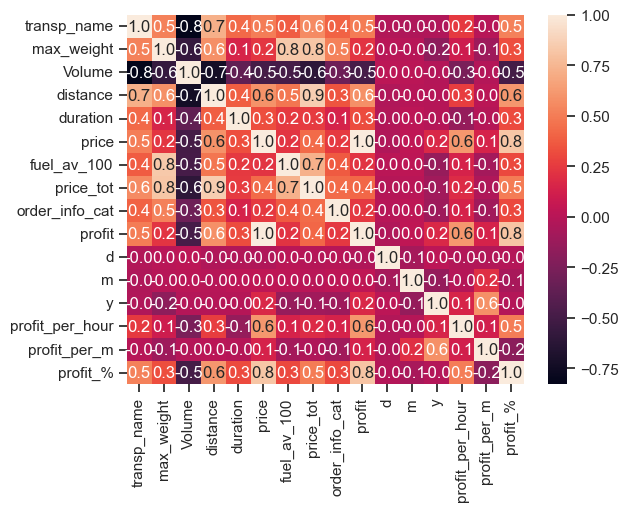

In [86]:
sns.heatmap(df_preprocessed.corr(), annot=True, fmt='.1f')

In [87]:
df_preprocessed = df_preprocessed.drop(axis=1,columns=['d', 'y', 'm', 'price'])


<Axes: >

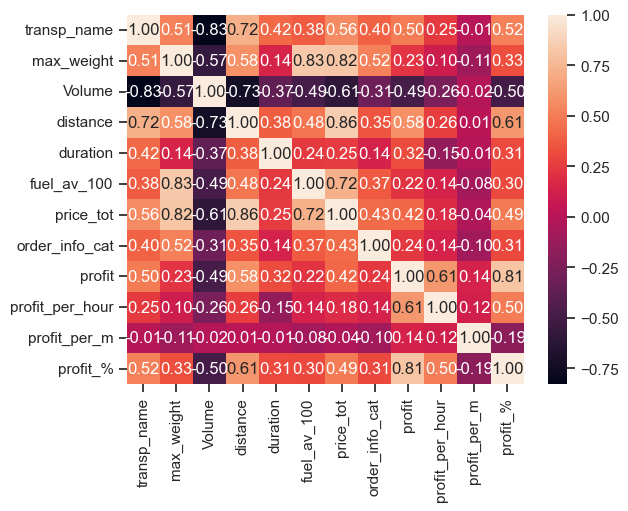

In [88]:
sns.heatmap(df_preprocessed.corr(), annot=True, fmt='.2f')

<Axes: >

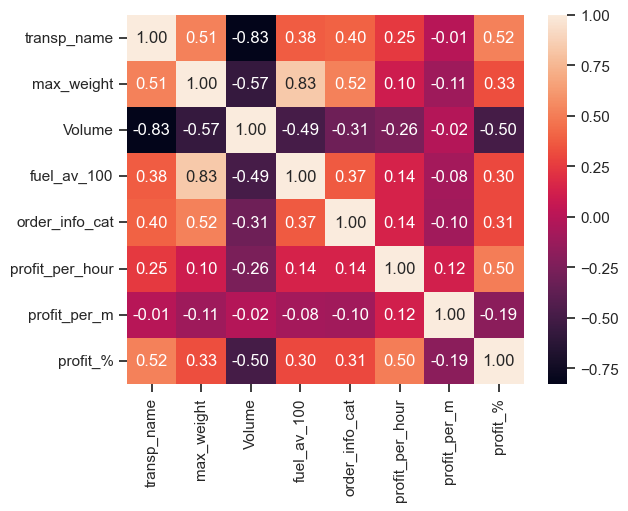

In [89]:
sns.heatmap(df_preprocessed.drop(columns=['duration', 'distance', 'price_tot', 'profit']).corr(), annot=True, fmt='.2f')

In [192]:
df_corr = df_preprocessed.drop(columns=['duration', 'distance', 'price_tot', 'profit']).rename( columns={'max_weight':
'Грузоподъёмность, т', 'fuel_av_100': 'Расход топлива на 100 км', 'order_info_cat':'Категория заказа', 'profit_per_hour': 'Прибыль за час поездки', 'profit_%': 'Процент месячной прибыли от поездки', 'profit_per_m': 'Прибыль за месяц','Volume': 'Тип кузова'})

In [193]:
df_fin = df_preprocessed.drop(columns=['duration', 'distance', 'price_tot', 'profit'])

In [194]:
df_corr = df_corr.drop(columns='transp_name')

<Axes: >

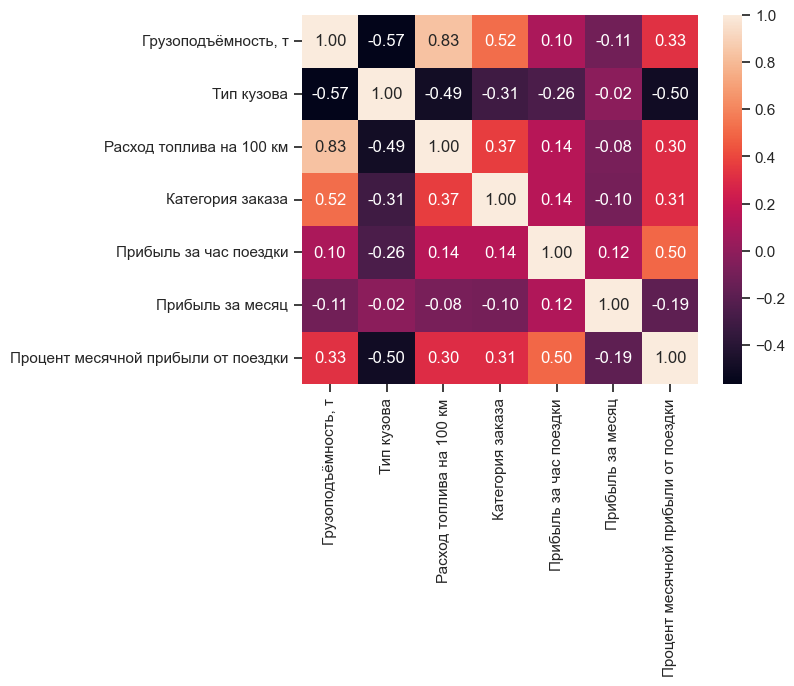

In [195]:
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f')

In [94]:
df_fin.head()

,transp_name,max_weight,Volume,fuel_av_100,order_info_cat,profit_per_hour,profit_per_m,profit_%
0,0,1.0,6,10.269620,2,952.558819,1.262957e+06,0.002263
1,0,1.0,6,8.266780,2,594.660782,1.262957e+06,0.002354
2,0,1.0,6,12.705075,1,1230.827801,1.262957e+06,0.002924
3,0,1.0,6,12.962446,2,1043.481642,1.262957e+06,0.003305
4,0,1.0,6,8.648527,3,376.118927,1.262957e+06,0.000893


In [95]:
df_unique_categories = df_fin.groupby('transp_name')['order_info_cat'].unique().reset_index()
df_unique_categories.head()

,transp_name,order_info_cat
0,0,"[2, 1, 3, 7, 8, 0, 9, 4, 5, 6]"
1,1,"[3, 2, 7, 8, 6, 1, 9, 4]"
2,2,"[3, 2, 1, 7, 9, 8]"
3,3,"[1, 7, 3, 2, 6, 8, 9]"
4,4,"[2, 7, 1, 9, 6, 5, 3, 8, 4]"


In [96]:

# Преобразование списков категорий в строки
df_unique_categories['order_info_cat_uniq'] = df_unique_categories['order_info_cat'].apply(lambda x: ' '.join(map(str, sorted(x))))

df_unique_categories.head()

,transp_name,order_info_cat,order_info_cat_uniq
0,0,"[2, 1, 3, 7, 8, 0, 9, 4, 5, 6]",0 1 2 3 4 5 6 7 8 9
1,1,"[3, 2, 7, 8, 6, 1, 9, 4]",1 2 3 4 6 7 8 9
2,2,"[3, 2, 1, 7, 9, 8]",1 2 3 7 8 9
3,3,"[1, 7, 3, 2, 6, 8, 9]",1 2 3 6 7 8 9
4,4,"[2, 7, 1, 9, 6, 5, 3, 8, 4]",1 2 3 4 5 6 7 8 9


In [97]:
df_unique_categories =df_unique_categories.drop(axis=1, columns = 'order_info_cat')

In [98]:
df_merged = df.merge(df_unique_categories, on='transp_name', how='left')


In [99]:
df_merged.head(10)

,transp_name,max_weight,Volume,distance,duration,price,fuel_av_100,price_tot,order_info_cat,profit,d,m,y,profit_per_hour,profit_per_m,profit_%,order_info_cat_uniq
0,0,1.0,6,120.000,3.0,2870,10.269620,12.323544,2,2857.676456,15,5,2019,952.558819,1.262957e+06,0.002263,0 1 2 3 4 5 6 7 8 9
1,0,1.0,6,81.000,5.0,2980,8.266780,6.696092,2,2973.303908,19,5,2019,594.660782,1.262957e+06,0.002354,0 1 2 3 4 5 6 7 8 9
2,0,1.0,6,130.000,3.0,3709,12.705075,16.516598,1,3692.483402,24,5,2019,1230.827801,1.262957e+06,0.002924,0 1 2 3 4 5 6 7 8 9
3,0,1.0,6,124.000,4.0,4190,12.962446,16.073433,2,4173.926567,21,5,2019,1043.481642,1.262957e+06,0.003305,0 1 2 3 4 5 6 7 8 9
4,0,1.0,6,19.000,3.0,1130,8.648527,1.643220,3,1128.356780,27,5,2019,376.118927,1.262957e+06,0.000893,0 1 2 3 4 5 6 7 8 9
5,0,1.0,6,34.000,4.0,2530,8.554540,2.908544,2,2527.091456,23,5,2019,631.772864,1.262957e+06,0.002001,0 1 2 3 4 5 6 7 8 9
6,0,1.0,6,14.000,4.0,2810,8.309603,1.163344,2,2808.836656,25,5,2019,702.209164,1.262957e+06,0.002224,0 1 2 3 4 5 6 7 8 9
7,0,1.0,6,9.000,5.0,1640,9.638792,0.867491,2,1639.132509,29,5,2019,327.826502,1.262957e+06,0.001298,0 1 2 3 4 5 6 7 8 9
8,0,1.0,6,210.000,4.0,6000,10.871464,22.830075,1,5977.169925,31,5,2019,1494.292481,1.262957e+06,0.004733,0 1 2 3 4 5 6 7 8 9
9,0,1.0,6,0.772,4.0,1861,9.822875,0.075833,2,1860.924167,2,6,2019,465.231042,7.058395e+05,0.002636,0 1 2 3 4 5 6 7 8 9


In [100]:
# Применение Multi-Hot Encoding к колонке 'массив_категорий'
df_encoded = df_merged['order_info_cat_uniq'].str.get_dummies(sep=' ')

In [101]:
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1


In [102]:
df_combined = pd.concat([df_fin, df_encoded], axis=1)

In [103]:
df_combined = df_combined.drop(columns=['transp_name'])

<Axes: >

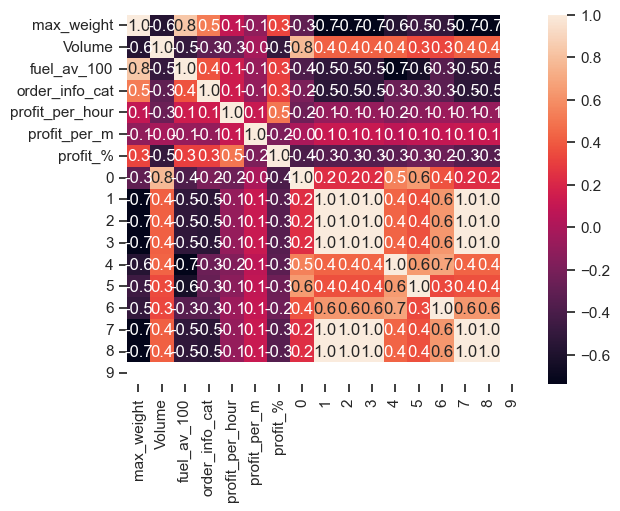

In [104]:
sns.heatmap(df_combined.corr(), annot=True, fmt='.1f')

In [105]:
df_combined.isnull().sum()
df_combined =df_combined.dropna()

In [106]:
df_combined.drop(columns='order_info_cat')

,max_weight,Volume,fuel_av_100,profit_per_hour,profit_per_m,profit_%,0,1,2,3,4,5,6,7,8,9
0,1.0,6.0,10.269620,952.558819,1.262957e+06,0.002263,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,6.0,8.266780,594.660782,1.262957e+06,0.002354,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,6.0,12.705075,1230.827801,1.262957e+06,0.002924,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,6.0,12.962446,1043.481642,1.262957e+06,0.003305,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,6.0,8.648527,376.118927,1.262957e+06,0.000893,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4562,1.4,5.0,7.303558,1022.711552,2.577738e+06,0.004761,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4563,1.4,5.0,9.835480,7308.285644,2.577738e+06,0.004253,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4564,1.4,5.0,7.308717,9613.654108,3.240440e+06,0.004450,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4565,1.4,5.0,10.077385,7186.202009,2.577738e+06,0.004182,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [107]:
df_shuffled = df_combined.sample(frac=1, random_state=32)
df_shuffled.head()

,max_weight,Volume,fuel_av_100,order_info_cat,profit_per_hour,profit_per_m,profit_%,0,1,2,3,4,5,6,7,8,9
1002,1.0,6.0,11.941087,2.0,1122.507364,8.274266e+05,0.002713,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2599,28.0,0.0,37.613834,9.0,7816.539343,2.043914e+06,0.030594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25,1.0,6.0,11.360534,3.0,467.386395,7.058395e+05,0.002649,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2066,1.5,1.0,12.182916,7.0,2281.873897,1.380524e+06,0.021488,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
163,1.0,6.0,10.895640,2.0,1288.389045,1.233530e+06,0.003133,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [159]:
df_shuffled.head()

,max_weight,Volume,fuel_av_100,order_info_cat,profit_per_hour,profit_per_m,profit_%,0,1,2,3,4,5,6,7,8,9
1002,1.0,6.0,11.941087,2.0,1122.507364,8.274266e+05,0.002713,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2599,28.0,0.0,37.613834,9.0,7816.539343,2.043914e+06,0.030594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25,1.0,6.0,11.360534,3.0,467.386395,7.058395e+05,0.002649,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2066,1.5,1.0,12.182916,7.0,2281.873897,1.380524e+06,0.021488,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
163,1.0,6.0,10.895640,2.0,1288.389045,1.233530e+06,0.003133,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


РИДЖ-РЕГРЕССИЯ

In [230]:
df_X_R = df_shuffled.drop(columns=['profit_%', 'profit_per_hour'])
df_y_R = df_shuffled['profit_%']

In [231]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


X_R = df_X_R
y_R = df_y_R
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_R, y_R, test_size=0.3, random_state=1)

In [233]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge

# Создаем модель Ridge регрессии
ridge_model = Ridge()

shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

param_grid = {
    'alpha': [1, 2, 3, 4, 5],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'tol': [0.0001, 0.00001, 0.000001],
    'max_iter': [1000, 2000, 3000],
}
# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, cv=shuffle_split, scoring='r2')
grid_search.fit(X_train_R, y_train_R)

best_ridge_model = grid_search.best_estimator_

y_pred_R = best_ridge_model.predict(X_test_R)


# Оцените модель
mse_R = mean_squared_error(y_test_R, y_pred_R)
r2_R = r2_score(y_test_R, y_pred_R)

print(f'Mean Squared Error: {mse_R}')
print(f'R^2 Score: {r2_R}')

C:\Users\vesha\PycharmProjects\transport\envTransp\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vesha\PycharmProjects\transport\envTransp\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vesha\PycharmProjects\transport\envTransp\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vesha\PycharmProjects\transport\envTransp\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vesha\PycharmProjects\transport\envTransp\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

Mean Squared Error: 0.00024296570339464005
R^2 Score: 0.3848361552805437


C:\Users\vesha\PycharmProjects\transport\envTransp\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [196]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error, mean_squared_log_error, median_absolute_error

# Calculate additional evaluation metrics
mae_R = mean_absolute_error(y_test_R, y_pred_R)
explained_variance = explained_variance_score(y_test_R, y_pred_R)

median_ae_R = median_absolute_error(y_test_R, y_pred_R)

print(f'Mean Squared Error: {mse_R}')
print(f'R^2 Score: {r2_R}')
print(f'Mean Absolute Error: {mae_R}')
print(f'Explained Variance Score: {explained_variance}')

print(f'Median Absolute Error: {median_ae_R}')

Mean Squared Error: 0.00024296570339457426
R^2 Score: 0.38483615528071036
Mean Absolute Error: 0.009023207813259887
Explained Variance Score: 0.3848376978185316
Median Absolute Error: 0.004754909692237526


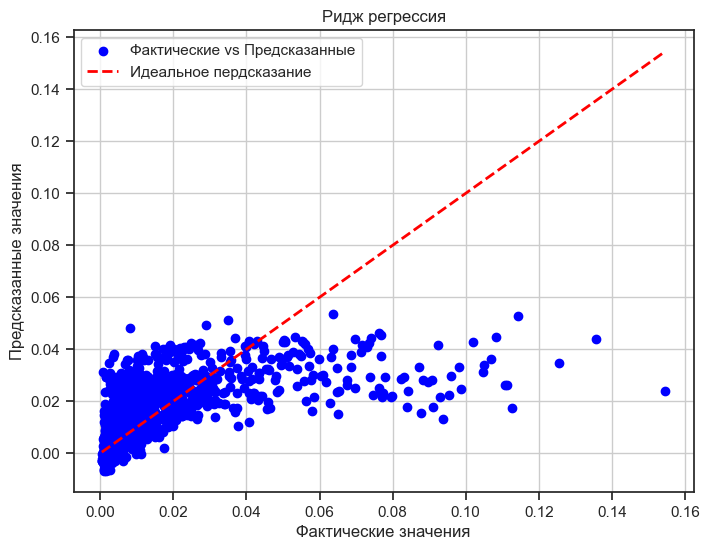

In [204]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_R, y_pred_R, color='blue', label='Фактические vs Предсказанные')
plt.plot([y_test_R.min(), y_test_R.max()], [y_test_R.min(), y_test_R.max()], linestyle='--', color='red', linewidth=2, label='Идеальное пердсказание')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Ридж регрессия')
plt.legend()
plt.grid(True)
plt.show()

БЭГГИНГ

In [168]:
df_X_B = df_shuffled.drop(columns=['profit_%', 'profit_per_hour', 'fuel_av_100', 'order_info_cat', 'profit_per_m'])
df_y_B = df_shuffled['profit_%']

In [169]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


X_B = df_X_B
y_B = df_y_B
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size=0.3, random_state=1)

In [170]:
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Загрузите данные и п

# Создайте модель k-NN
knn_model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7],
    'leaf_size': [5, 10, 15],
    'p': [1, 2],  # параметр p: 1 - манхэттенское расстояние, 2 - евклидово расстояние
    'n_jobs': [-1]
}
# Выполняем решетчатый поиск
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_B, y_train_B)

best_knn_model = grid_search.best_estimator_


# Создайте модель бэггинга на основе k-NN
bagging_model = BaggingRegressor(estimator=best_knn_model)

# Обучите модель
bagging_model.fit(X_train_B, y_train_B)

# Получите прогнозы
y_pred_B = bagging_model.predict(X_test_B)

# Оцените модель
mse_B = mean_squared_error(y_test_B, y_pred_B)
r2_B = r2_score(y_test_B, y_pred_B)

print(f'Mean Squared Error: {mse_B}')
print(f'R^2 Score: {r2_B}')

Mean Squared Error: 0.00023489450044549367
R^2 Score: 0.40527160015336705


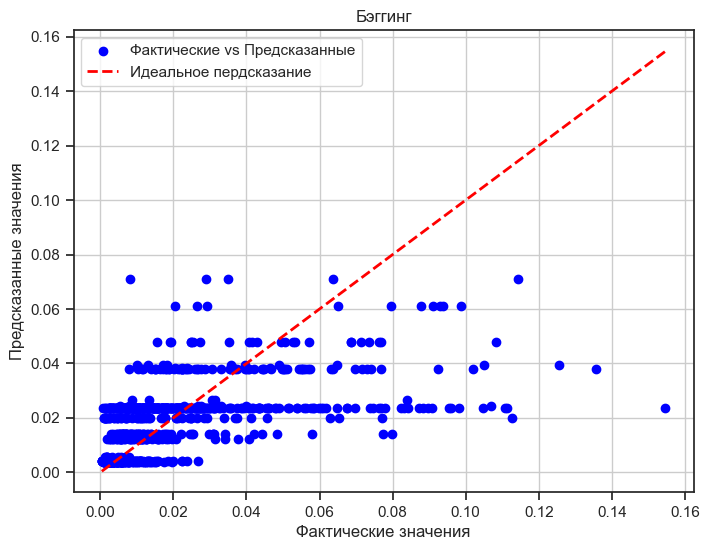

In [200]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_B, y_pred_B, color='blue', label='Фактические vs Предсказанные')
plt.plot([y_test_B.min(), y_test_B.max()], [y_test_B.min(), y_test_B.max()], linestyle='--', color='red', linewidth=2, label='Идеальное пердсказание')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Бэггинг')
plt.legend()
plt.grid(True)
plt.show()

In [171]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error, mean_squared_log_error, median_absolute_error

# Calculate additional evaluation metrics
mae_B = mean_absolute_error(y_test_B, y_pred_B)
explained_variance_B = explained_variance_score(y_test_B, y_pred_B)
max_err_B = max_error(y_test_B, y_pred_B)
mse_log_B = mean_squared_log_error(y_test_B, y_pred_B)
median_ae_B = median_absolute_error(y_test_B, y_pred_B)

print(f'Mean Squared Error: {mse_B}')
print(f'R^2 Score: {r2_B}')
print(f'Mean Absolute Error: {mae_B}')
print(f'Explained Variance Score: {explained_variance_B}')
print(f'Maximum Error: {max_err_B}')
print(f'Mean Squared Log Error: {mse_log_B}')
print(f'Median Absolute Error: {median_ae_B}')

Mean Squared Error: 0.00023489450044549367
R^2 Score: 0.40527160015336705
Mean Absolute Error: 0.00853329484799417
Explained Variance Score: 0.4052801676964036
Maximum Error: 0.13121404283516863
Mean Squared Log Error: 0.00021409479704268897
Median Absolute Error: 0.003070769659380557


СЛУЧАЙНЫЙ ЛЕС

In [172]:
df_X_F = df_shuffled.drop(columns=['profit_%', 'profit_per_hour', 'max_weight'])
df_y_F = df_shuffled['profit_%']

In [173]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X = df_X_F
y = df_y_F
X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(X, y, test_size=0.3, random_state=1)

In [174]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


param_grid = {
    'n_estimators': [90, 120, 150],
    'max_depth': [4, 5, 6],
    'min_samples_split': [20, 45, 60],
    'min_samples_leaf': [1, 2, 4, 5]
}


# Создайте модель случайного леса
rf_model = RandomForestRegressor(max_features=3)

# Настройка параметров с использованием GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_F, y_train_F)

# Получите лучшую модель
best_rf_model = grid_search.best_estimator_

# Получите прогнозы
y_pred_F = best_rf_model.predict(X_test_F)

# Оцените модель
mse_F = mean_squared_error(y_test_F, y_pred_F)
r2_F = r2_score(y_test_F, y_pred_F)

print(f'Mean Squared Error: {mse_F}')
print(f'R^2 Score: {r2_F}')

Mean Squared Error: 0.00020502855603746553
R^2 Score: 0.4808890594553429


In [175]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error, mean_squared_log_error, median_absolute_error

# Calculate additional evaluation metrics
mae_F = mean_absolute_error(y_test_F, y_pred_F)
explained_variance_F = explained_variance_score(y_test_F, y_pred_F)
max_err_F = max_error(y_test_B, y_pred_F)
mse_log_F = mean_squared_log_error(y_test_F, y_pred_F)
median_ae_F = median_absolute_error(y_test_F, y_pred_F)

print(f'Mean Squared Error: {mae_F}')
print(f'R^2 Score: {r2_F}')
print(f'Mean Absolute Error: {mae_F}')
print(f'Explained Variance Score: {explained_variance_F}')
print(f'Maximum Error: {max_err_F}')
print(f'Mean Squared Log Error: {mse_log_F}')
print(f'Median Absolute Error: {median_ae_F}')

Mean Squared Error: 0.007812845364476306
R^2 Score: 0.4808890594553429
Mean Absolute Error: 0.007812845364476306
Explained Variance Score: 0.4808890840044744
Maximum Error: 0.13472892403864106
Mean Squared Log Error: 0.0001862586873407981
Median Absolute Error: 0.0032175595011337214


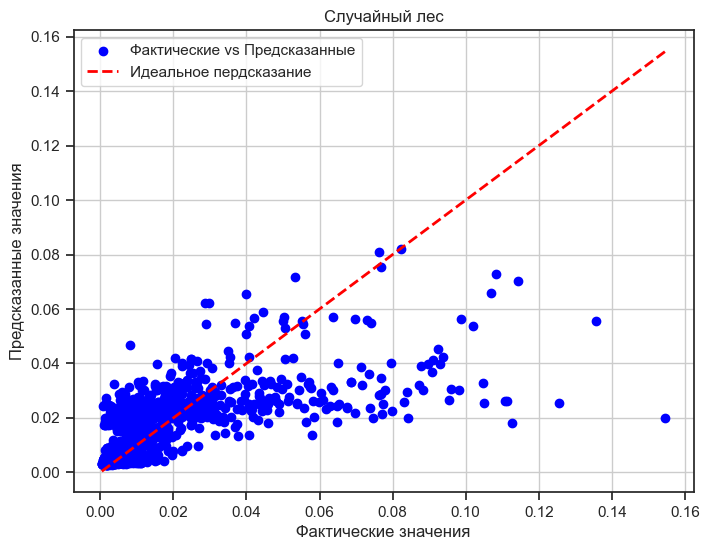

In [202]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_F, y_pred_F, color='blue', label='Фактические vs Предсказанные')
plt.plot([y_test_F.min(), y_test_F.max()], [y_test_F.min(), y_test_F.max()], linestyle='--', color='red', linewidth=2, label='Идеальное пердсказание')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Случайный лес')
plt.legend()
plt.grid(True)
plt.show()

Стэккинг

In [238]:
df_X = df_shuffled.drop(columns=['profit_%', 'profit_per_hour'])
df_y = df_shuffled['profit_%']

X = df_X
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Ридж + Случайны лес

In [223]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Определите модель стекинга с тремя базовыми моделями
estimators = [
    #('bagging', bagging_model),
    ('ridge', best_ridge_model),
    ('random_forest', best_rf_model)
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(fit_intercept=False, positive=True)
)

# Обучение модели стекинга
stack.fit(X_train, y_train)

# Прогнозы на тестовом наборе
y_pred = stack.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.00020058821644021614
R^2 Score: 0.4921315366459085


Три модели

In [236]:

estimators = [
    ('bagging', bagging_model),
    ('ridge', best_ridge_model),
    ('random_forest', best_rf_model)
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(fit_intercept=False, positive=True)
)

# Обучение модели стекинга
stack.fit(X_train, y_train)

# Прогнозы на тестовом наборе
y_pred = stack.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.00020264483628005712
R^2 Score: 0.4869243895048656


Ридж + Бэггиг

In [239]:

estimators = [
    ('bagging', bagging_model),
    ('ridge', best_ridge_model),
    #('random_forest', best_rf_model)
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(fit_intercept=False, positive=True)
)

# Обучение модели стекинга
stack.fit(X_train, y_train)

# Прогнозы на тестовом наборе
y_pred = stack.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.00023882795716916166
R^2 Score: 0.39531249758307985


Бэггиг + Случайный лес

In [240]:

estimators = [
    ('bagging', bagging_model),
    #('ridge', best_ridge_model),
    ('random_forest', best_rf_model)
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(fit_intercept=False, positive=True)
)

# Обучение модели стекинга
stack.fit(X_train, y_train)

# Прогнозы на тестовом наборе
y_pred = stack.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.0002058891339858842
R^2 Score: 0.47871016575951075


СРАВНЕНИЕ МОДЕЛЕЙ

In [213]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

In [224]:
# Результаты
array_labels = ['Случайный лес + Ридж регрессия + Бэггинг','Случайный лес + Ридж регрессия', 'Случайный лес + Бэггинг', 'Бэггинг + Ридж регрессия', 
                'Случайный лес', 'Бэггинг', 'Ридж регрессия']
array_mae = [0.507, 0.512, 0.503, 
             0.414, 0.425, 0.405, 
             0.501]

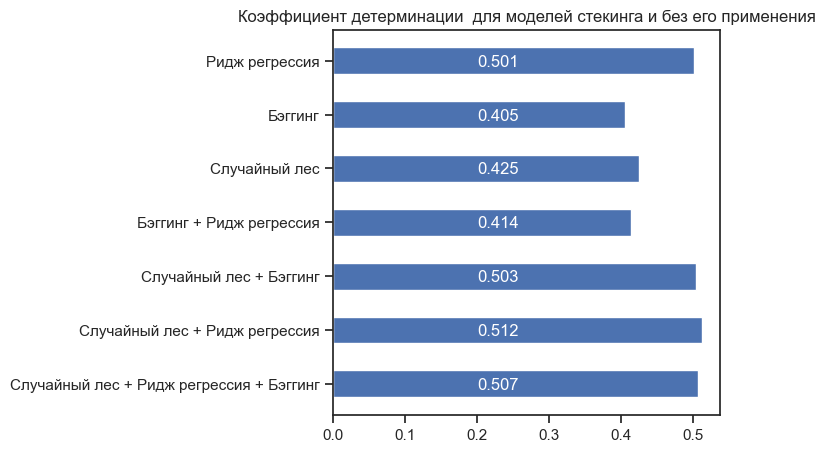

In [225]:
vis_models_quality(array_mae, array_labels, 'Коэффициент детерминации  для моделей стекинга и без его применения')

Финальная модель

In [242]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Определите модель стекинга с тремя базовыми моделями
estimators = [
    #('bagging', bagging_model),
    ('ridge', best_ridge_model),
    ('random_forest', best_rf_model)
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(fit_intercept=False, positive=True)
)

# Обучение модели стекинга
stack.fit(X_train, y_train)

# Прогнозы на тестовом наборе
y_pred = stack.predict(X_test)



In [243]:
from sklearn.metrics import mean_absolute_error, explained_variance_score, max_error, mean_squared_log_error, median_absolute_error
mae = mean_absolute_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
mse_log = mean_squared_log_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)
rmmse = mean_squared_error(y_test, y_pred, squared= False)
print(f'Root Mean Squared Error: {rmmse}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'Median Absolute Error: {median_ae}')

Root Mean Squared Error: 0.014305416342201258
Mean Squared Error: 0.00020399645275406985
Mean Absolute Error: 0.007955189403685416
R^2 Score: 0.481860343585802
Median Absolute Error: 0.0030913389673603337


C:\Users\vesha\PycharmProjects\transport\envTransp\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


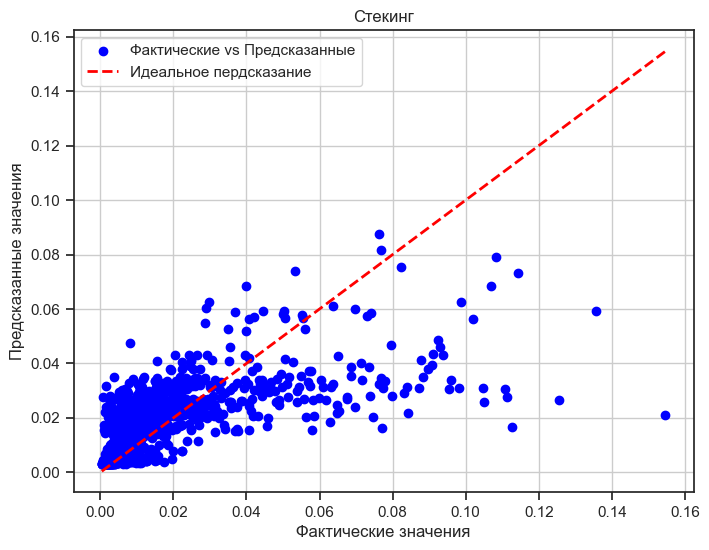

In [227]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Фактические vs Предсказанные')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2, label='Идеальное пердсказание')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Cтекинг')
plt.legend()
plt.grid(True)
plt.show()